In [1]:
import sys
sys.path.append('../')
sys.dont_write_bytecode = True
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline
#matplotlib.rcParams['figure.facecolor'] = [0.37]*3
import numba
sys.path.append('/Users/Michael_Saha/Repositories/')
from fire_sim import *

#### Demonstrate that the amount of energy released by a cell is equal to the sum of the energies applied to neighbors

Amean 0.5
tf True
Sum of energies 30.0


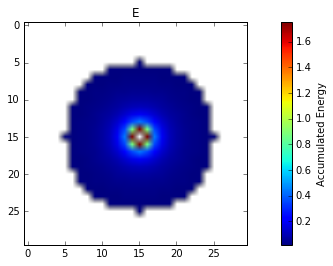

In [13]:
# TODO: Test that a unit of energy given to all neighbors is one
test_size = 30,30
L = np.ones(test_size,dtype=int)
E = np.zeros(test_size,dtype=float)
A = np.zeros_like(E)
A[:] = 0.5
R = np.zeros_like(E)
F = np.zeros(test_size,dtype=int)

y,x = np.array([15]), np.array([15])
fires = np.zeros(1000, dtype=int), np.zeros(1000, dtype=int)
active = np.array([0,0],dtype=int)
ignite_fires((y, x), fires,active, L, F)
#print('Fires lit:', fire_successfully_lit)

print('Amean',np.mean(A))
R[y, x] = 30

#tf = burn_next_active_pixel(fires,active,L,E,A,R,F)
#tf = burn_all(fires, active, L, E, A, R, F)
tf = burn_next_iteration(fires, active, L,E,A,R,F)

print('tf',tf)
E[E==0] = np.nan

fig = figure(figsize=(12,4))
ax = fig.add_subplot()
imshow(E)
title('E')
colorbar(label='Accumulated Energy')

print('Sum of energies',np.nansum(E))
assert np.nansum(E) == R[y, x]

#### Demonstrate that parameterizing input distributions works:

In [14]:
my_norm = parameterize_truncate_distribution(np.random.normal,10,3)
sample = my_norm(1000000)
print(np.mean(sample), np.std(sample))

10.0008812303 2.99059019879
